In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [21]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [22]:
train['Embarked'] = pd.Categorical(train['Embarked'])
train['Embarked'] = train['Embarked'].cat.codes

train['Age'] = train['Age'].apply(lambda x: 27.0 if np.isnan(x)==True else x)
train['Age_cat'] = train['Age'].apply(lambda x: '0-6' if x<=6 else ('6-12' if x<=12 else ('12-18') if x<=18 else ('18-24') if x<=24 else ('24-30' if x<=30 else ('30-40' if x<=40 else ('40-55' if x<=55 else '55+')))))
train['Age_cat'] = pd.Categorical(train['Age_cat'])
train['Age_cat'] = train['Age_cat'].cat.codes

train['Family'] = train['SibSp'] + train['Parch']
train['Family'] = train['Family'].apply(lambda x: 1 if x>0 else 0)

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
train['Title'] = train['Title'].apply(lambda x: 'Miss' if (x == 'Ms')|(x=='Miss')|(x=='Mlle') else ('Mrs' if (x == 'Mrs')|(x=='Mme') else ('Mr' if x=='Mr' else ('Master' if x=='Master' else 'Other'))))
train['Title'] = pd.Categorical(train['Title'])
train['Title'] = train['Title'].cat.codes

train['Sex'] = train['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [23]:
X = train[['Sex', 'Pclass', 'Fare', 'Embarked', 'Title', 'Family']]
y = train['Survived']

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8)

input_shape = [X_train.shape[1]]

In [25]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 6)                 24        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                1

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy',
    metrics=['binary_accuracy'],)

Epoch 1/1000
2/2 [==============================] - 3s 354ms/step - loss: 0.7388 - binary_accuracy: 0.5787 - val_loss: 0.7279 - val_binary_accuracy: 0.3855
Epoch 2/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7150 - binary_accuracy: 0.6334 - val_loss: 0.7124 - val_binary_accuracy: 0.4022
Epoch 3/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.6661 - binary_accuracy: 0.6503 - val_loss: 0.7061 - val_binary_accuracy: 0.3911
Epoch 4/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.6133 - binary_accuracy: 0.6924 - val_loss: 0.7012 - val_binary_accuracy: 0.3855
Epoch 5/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.5809 - binary_accuracy: 0.7107 - val_loss: 0.6979 - val_binary_accuracy: 0.3743
Epoch 6/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.5430 - binary_accuracy: 0.7388 - val_loss: 0.6960 - val_binary_accuracy: 0.4022
Epoch 7/1000
2/2 [==============================] - 0s 39ms/step - lo

<Axes: title={'center': 'Accuracy'}>

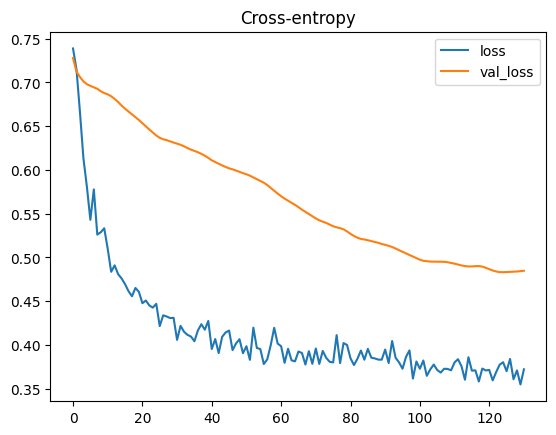

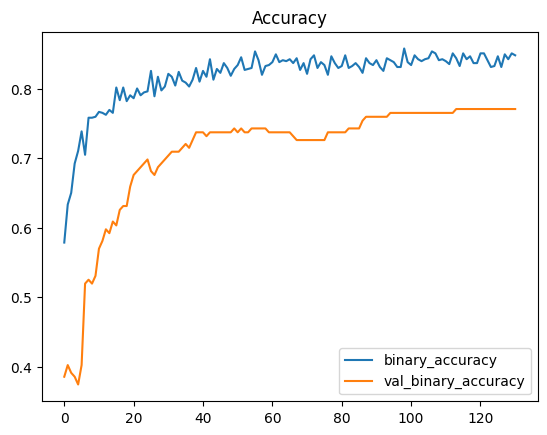

In [28]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=8,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=1000,
    batch_size=512,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [29]:
test['Age'].median()
test['Sex'] = test['Sex'].apply(lambda x: 0 if x=='male' else 1)
test['Age'] = test['Age'].apply(lambda x: 27.0 if np.isnan(x)==True else x)
test['Age_cat'] = test['Age'].apply(lambda x: '0-6' if x<=6 else ('6-12' if x<=12 else ('12-18') if x<=18 else ('18-24') if x<=24 else ('24-30' if x<=30 else ('30-40' if x<=40 else ('40-55' if x<=55 else '55+')))))
test['Age_cat'] = pd.Categorical(test['Age_cat'])
test['Age_cat'] = test['Age_cat'].cat.codes
test['Embarked'] = pd.Categorical(test['Embarked'])
test['Embarked'] = test['Embarked'].cat.codes
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Title'].apply(lambda x: 'Miss' if (x == 'Ms')|(x=='Miss')|(x=='Mlle') else ('Mrs' if (x == 'Mrs')|(x=='Mme') else ('Mr' if x=='Mr' else ('Master' if x=='Master' else 'Other'))))
test['Title'] = pd.Categorical(test['Title'])
test['Title'] = test['Title'].cat.codes
test['Family'] = test['SibSp'] + test['Parch']
test['Family'] = test['Family'].apply(lambda x: 1 if x>0 else 0)
test_X = test[['Sex', 'Pclass', 'Fare', 'Embarked', 'Title', 'Family']]

In [30]:
pd.DataFrame(test_X).fillna(0, inplace=True)
median = test_X.median()
test_X['Fare'] = test_X['Fare'].fillna(median)

In [31]:
df = pd.DataFrame()
test_X = StandardScaler().fit_transform(test_X)
df['PassengerId'] = test['PassengerId']
df['Survived'] = model.predict(test_X).round().astype(int)

14/14 [==============================] - 0s 2ms/step


In [32]:
df.to_csv('submission.csv',index=False)